In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchdyn.core import NeuralODE

device = torch.device("cpu")

In [13]:
# Initialize
g = 9.81  # m/s^2
l = 2  # m
omega0 = 2.0  # /s

m = 1 #kg
b = 1 #저항 상수

t = torch.linspace(0, 10, 100)
t_np = t.numpy()

In [14]:
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.theta_dot = nn.Parameter(torch.tensor([omega0]))  # 학습 가능한 매개변수

    def forward(self, t, theta):
        theta_dot = theta[:, 1]  # 현재 각속도를 가져옴
        theta_ddot = -(g / l) * torch.sin(theta[:, 0]) - (b/m) * theta_dot
        return torch.stack((theta_dot, theta_ddot), dim=1)

In [15]:
model = NeuralODE(ODEFunc(), sensitivity='adjoint', solver='tsit5', atol=1e-3, rtol=1e-3).to(device)

theta0 = torch.tensor([[0., omega0]])

solution = model(theta0, t)[1]  # 튜플의 두 번째 요소로부터 텐서로 추출

# 진자의 각도, 각속도 계산
theta_np = solution[:, :, 0].cpu().detach().numpy()
omega_np = solution[:, :, 1].cpu().detach().numpy()
x = l * np.sin(theta_np)
y = -l * np.cos(theta_np)

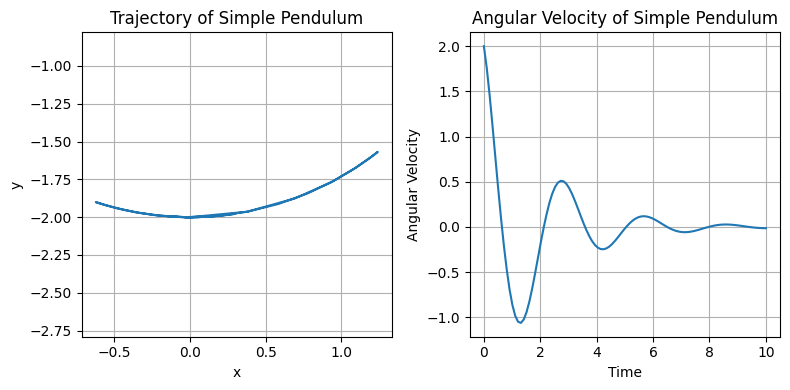

In [16]:
plt.figure(figsize=(8, 4))

# 진자 운동 그래프
plt.subplot(1, 2, 1)
plt.plot(x,y, label='x position')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of Simple Pendulum')
plt.grid(True)
plt.axis('equal')  # x와 y 축의 스케일을 동일하게 설정하여 호의 형태로 나타나게끔 유지

# 시간에 따른 진자의 각속도 그래프
plt.subplot(1, 2, 2)
plt.plot(t_np, omega_np[:, 0], label='angular velocity')
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Angular Velocity of Simple Pendulum')
plt.grid(True)

plt.tight_layout()
plt.show()
